# Problem Title

Classification Model-Build a Model that Classifies the Side Effects of a Drug 

# Project Description 

The objective of this project is to build a classification model that classifies the side effects of a perticular drug

# Features Explanation

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the dataset into the python

In [2]:
data=pd.read_csv("C:/Users/XArchitecture/Desktop/internship/webmd.csv")

In [3]:
data.head(20)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
5,55-64,Other,7/19/2008,warfarin (bulk) 100 % powder,144731,4,4,help heart condition operation well,4,Male,,0
6,25-34,Birth Control,6/15/2017,wymzya fe,163180,5,5,Haven't gotten pregnant so it does it's job. I...,2,Female,"Nausea , vomiting , headache , bloating , ...",0
7,45-54,Disease of Ovaries with Cysts,1/30/2017,wymzya fe,163180,5,5,I have take this for 5 years age 45-50 to prev...,5,Female,"Nausea , vomiting , headache , bloating , ...",0
8,25-34,Acne,4/27/2016,wymzya fe,163180,4,2,,2,Female,"Nausea , vomiting , headache , bloating , ...",1
9,55-64,Stuffy Nose,10/29/2012,"12 hour nasal relief spray, non-aerosol",9800,4,2,The 12 hour spray only works for me for 6 hours.,2,Male,"Temporary burning, stinging, dryness in the no...",0


#### Basic Checks in the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [5]:
data.shape

(362806, 12)

#### Check the datatypes of the dataset

In [6]:
data.dtypes.value_counts().to_frame()

,0
object,7
int64,5


#### Basic statistical summary of the numerical variables

In [7]:
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


#### Check for the Duplicates

In [8]:
data.duplicated().sum()

943

In [9]:
data.loc[data.duplicated(),:]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
12102,55-64,High Blood Pressure,5/22/2013,lisinopril solution,6873,5,5,,5,Male,"Dizziness , lightheadedness , tiredness, or ...",0
17120,55-64,High Blood Pressure,5/22/2013,lisinopril,6873,5,5,,5,Male,"Dizziness , lightheadedness , tiredness, or ...",0
21816,75 or over,Other,9/6/2015,lucentis vial,144667,1,1,My father was in end stage Macular degenration...,1,Male,Mild discomfort and increased tears may occur ...,0
22427,35-44,Abnormally Long or Heavy Periods,8/22/2019,larin fe,165169,4,4,Tired and nauseous the first week taking Larin...,4,Female,"Nausea , vomiting , headache , bloating , ...",0
24302,25-34,Fungal Infection of Fingernails - Onychomycosis,8/3/2019,lamisil tablet,12422,2,2,Had a rare-ish fungal infection starting at th...,1,,Diarrhea or stomach upset may occur.,0
...,...,...,...,...,...,...,...,...,...,...,...,...
339647,55-64,Diverticulitis,8/9/2019,cipro,1124,1,3,Helped ease Diverticulitis pain when combined...,1,Female,"Nausea , diarrhea , dizziness , lightheaded...",0
339648,55-64,Diverticulitis,8/9/2019,"cipro suspension, microcapsule reconstituted",1124,1,3,Helped ease Diverticulitis pain when combined...,1,Female,"Nausea , diarrhea , dizziness , lightheaded...",0
343090,25-34,Excessive Sweating,9/20/2019,clonidine hcl er,11754,5,5,Medication did exactly what I needed it to do....,5,Male,"Dizziness , lightheadedness , drowsiness, tir...",0
343390,25-34,Excessive Sweating,9/20/2019,clonidine hcl,11754,5,5,Medication did exactly what I needed it to do....,5,Male,"Dizziness , lightheadedness , drowsiness, dr...",0


There are 943 duplicates values droping that by using drop_duplicates

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.duplicated().sum()

0

#### Check the Missing Values

In [12]:
data.isna().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

Only 37 null values presented in reviews column So it's better to remove null values presented columns

In [13]:
data=data.dropna()

In [14]:
data.shape

(361826, 12)

#### Exploratory Data Analysis

##### Now analysing each of the features individually and some features need some preprocessing before EDA

#### Sides

In [15]:
data['Sides'].describe()

count     361826
unique      1651
top             
freq       17058
Name: Sides, dtype: object

In [16]:
no_side=data.index[data['Sides'].apply(lambda x: x==' ')].tolist()

for i in no_side:
    data.loc[data.index==i,'Sides']='No side Effect .'  

In [17]:
data.loc[data.index, 'Sides'] = '[' + data['Sides'].astype(str)

In [18]:
data.loc[data.index, 'Sides'] = data['Sides'].astype(str) + ']'

In [19]:
def clean (li):
    li=li.replace('"','')
    li=li.replace(',',' ","')
    li=li.replace('[','["')
    li=li.replace(']',' "] ')
    li=li.replace('.',' ')
    
    return li

In [20]:
data['Sides']=data['Sides'].apply(clean)

In [21]:
data['Sides']=data['Sides'].apply(eval)

In [22]:
data['Sides']

0         [Drowsiness ,   dizziness  ,   dry mouth /nose...
1         [Drowsiness ,   dizziness  ,   dry mouth /nose...
2                                       [No side Effect   ]
3                                       [No side Effect   ]
4                                       [No side Effect   ]
                                ...                        
362801    [Nausea  ,   headache  ,   vomiting  ,  drowsi...
362802    [Nausea  ,   headache  ,   vomiting  ,  drowsi...
362803    [Nausea  ,   headache  ,   vomiting  ,  drowsi...
362804    [Nausea  ,   headache  ,   vomiting  ,  drowsi...
362805    [Nausea  ,   headache  ,   vomiting  ,  drowsi...
Name: Sides, Length: 361826, dtype: object

In [23]:
from collections import Counter
Counter([i for j in data.Sides for i in j])

Counter({'Drowsiness ': 44199,
         '  dizziness  ': 149754,
         '  dry mouth /nose/throat ': 98,
         '  headache  ': 79635,
         '  upset stomach  ': 9701,
         '  constipation  ': 93195,
         ' or  trouble sleeping  may occur  ': 11125,
         'No side Effect   ': 17058,
         'Nausea  ': 124945,
         '  vomiting  ': 118356,
         '  bloating  ': 18780,
         '  breast  tenderness ': 18707,
         ' swelling of the  ankles /feet (fluid retention) ': 12876,
         ' or  weight  change may occur  ': 13801,
         'Temporary burning ': 107,
         ' stinging ': 2548,
         ' dryness in the nose ': 107,
         '  runny nose  ': 2167,
         ' and  sneezing  may occur  ': 107,
         ' or  weight  gain may occur  ': 5621,
         'Constipation  ': 5383,
         '  diarrhea  ': 57686,
         ' or  upset stomach  may occur  ': 5977,
         ' and  muscle pain  may occur  ': 158,
         ' loss of appetite ': 49728,
         ' c

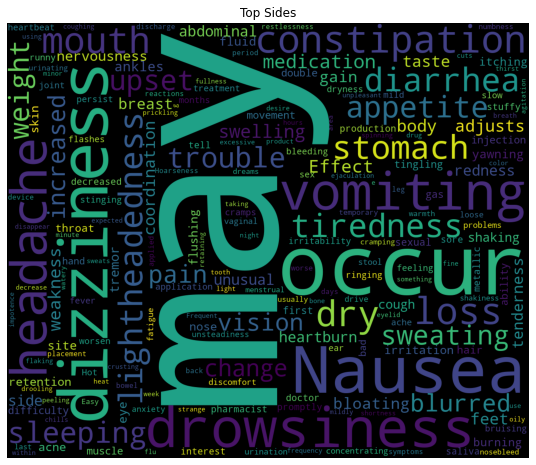

In [24]:
from wordcloud import WordCloud
from PIL import Image
plt.figure(figsize = (12,8))
text = ' '.join(i for j in data.Sides for i in j)
word_cld = WordCloud(max_font_size=None, background_color='black', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(word_cld)
plt.title("Top Sides")
plt.axis("off")
plt.show();

In [25]:
data['Sides']

0         [Drowsiness ,   dizziness  ,   dry mouth /nose...
1         [Drowsiness ,   dizziness  ,   dry mouth /nose...
2                                       [No side Effect   ]
3                                       [No side Effect   ]
4                                       [No side Effect   ]
                                ...                        
362801    [Nausea  ,   headache  ,   vomiting  ,  drowsi...
362802    [Nausea  ,   headache  ,   vomiting  ,  drowsi...
362803    [Nausea  ,   headache  ,   vomiting  ,  drowsi...
362804    [Nausea  ,   headache  ,   vomiting  ,  drowsi...
362805    [Nausea  ,   headache  ,   vomiting  ,  drowsi...
Name: Sides, Length: 361826, dtype: object

In [26]:
top_Sides =[ m[0] for m in Counter([i for j in data.Sides for i in j]).most_common(8)]

In [27]:
top_Sides

['  dizziness  ',
 'Nausea  ',
 '  vomiting  ',
 '  constipation  ',
 ' drowsiness ',
 '  headache  ',
 '  lightheadedness  ',
 '  dry mouth  ']

In [28]:
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [29]:
data["Sides_count"]=data['Sides'].apply(lambda x: len(x))

In [30]:
def categorise(row):  
    if row['Sides_count'] <= 4:
        return 0
    if row['Sides_count'] >4 and row['Sides_count'] <= 8:
        return 1
    if row['Sides_count'] > 8  and row['Sides_count'] <=12:
        return 2
    
    return 3

In [31]:
data['Sides_class'] = data.apply(lambda row: categorise(row), axis=1)

In [32]:
data[data['Sides_class']==2].head(2)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Sides_count,Sides_class
3326,19-24,Pinworm Infection,5/8/2015,pyrantel pamoate suspension,9999,5,5,I went to the doctors because I noticed I had ...,5,Female,"[Nausea , vomiting , diarrhea , stoma...",7,9,2
3327,25-34,Pinworm Infection,7/27/2014,pyrantel pamoate suspension,9999,3,5,I had a horrible pinworm infestation that was ...,5,Female,"[Nausea , vomiting , diarrhea , stoma...",13,9,2


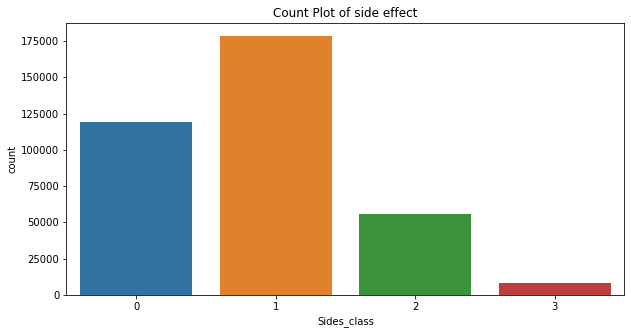

<Figure size 1080x360 with 0 Axes>

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sides_class',data=data)
plt.title("Count Plot of side effect" )
plt.figure(figsize=(15,5))
plt.tight_layout()
plt.show()

#### Age

In [34]:
data['Age'].value_counts().to_frame()

,Age
45-54,79857
55-64,74836
35-44,54948
25-34,49479
65-74,41121
19-24,24228
75 or over,15188
,12145
13-18,7045
7-12,1644


In [35]:
data['Age'].unique().tolist()

['75 or over',
 '25-34',
 '65-74',
 '35-44',
 '55-64',
 '45-54',
 '19-24',
 ' ',
 '13-18',
 '7-12',
 '0-2',
 '3-6']

In [36]:
data[data['Age']==' ']

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Sides_count,Sides_class
12,,Birth Control,7/3/2018,lyza,164750,2,1,This stuff needs to be removed from the market...,1,Female,"[Nausea , vomiting , headache , bloat...",0,6,1
73,,Abnormally Long or Heavy Periods,10/3/2012,lysteda,154120,5,5,54 YO with uterine fibroids and HEAVY clotting...,5,,"[Nausea , vomiting , diarrhea , and m...",10,4,0
91,,Abnormally Long or Heavy Periods,4/10/2012,lysteda,154120,3,4,I am 45 years old with fibroids. I have had he...,1,Female,"[Nausea , vomiting , diarrhea , and m...",18,4,0
184,,Neuropathic Pain,2/29/2020,lyrica,93965,5,5,No Script or health Insurance needed to place ...,5,,"[Drowsiness , dizziness , dry mouth , ...",12,6,1
185,,Nerve Pain after Herpes,2/24/2020,lyrica,93965,5,5,After using Lyrica for 3 weeks it really ly wo...,5,Male,"[Drowsiness , dizziness , dry mouth , ...",0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362517,,Stop Smoking,3/31/2010,chantix,144470,4,4,my husband and i are on chantix. saturday apri...,4,,"[Nausea , headache , vomiting , drowsi...",3,9,2
362571,,Stop Smoking,1/19/2010,chantix,144470,5,5,,3,,"[Nausea , headache , vomiting , drowsi...",0,9,2
362598,,Stop Smoking,12/9/2009,chantix,144470,5,5,,1,Male,"[Nausea , headache , vomiting , drowsi...",1,9,2
362645,,Stop Smoking,2/26/2009,chantix,144470,5,3,I have just started to take this medication. T...,3,,"[Nausea , headache , vomiting , drowsi...",9,9,2


In [37]:
age_null=data.index[data['Age'].apply(lambda x: x==' ')].tolist()

for i in age_null:
    data.loc[data.index==i,'Age']='Not mentioned'  

In [38]:
data['Age'].describe()

count     361826
unique        12
top        45-54
freq       79857
Name: Age, dtype: object

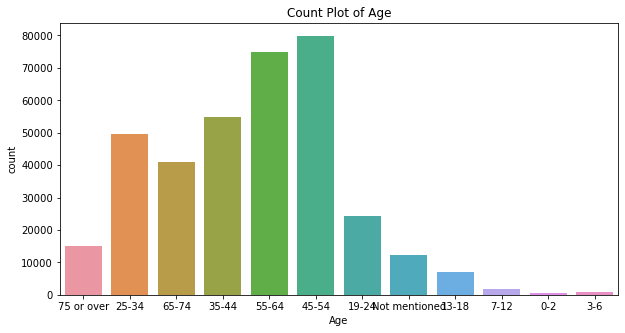

<Figure size 1080x360 with 0 Axes>

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(x='Age',data=data)
plt.title("Count Plot of Age" )
plt.figure(figsize=(15,5))
plt.tight_layout()
plt.show()

There Are 12 unique values in Age with 45-54 topping with arround 80000

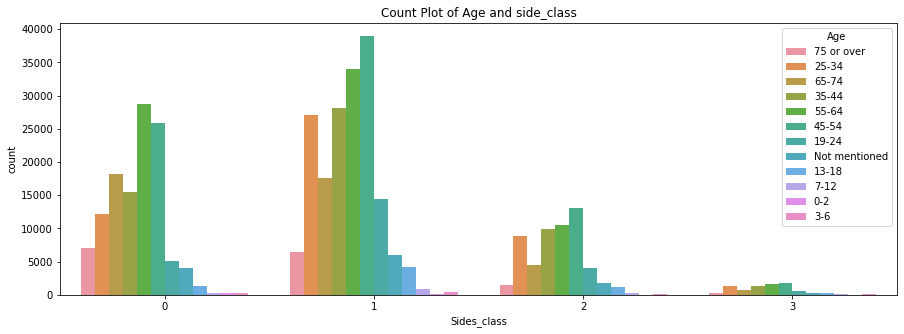

<Figure size 1080x360 with 0 Axes>

In [40]:
plt.figure(figsize=(15,5))
sns.countplot(x="Sides_class", hue='Age', data=data)
plt.title("Count Plot of Age and side_class" )
plt.figure(figsize=(15,5))
plt.tight_layout()

#### Condition

In [41]:
data['Condition'].describe()

count     361826
unique      1805
top        Other
freq       49332
Name: Condition, dtype: object

In [42]:
data['Condition'].unique()

array(['Stuffy Nose', 'Cold Symptoms', 'Other', ...,
       'Combative and Explosive Behavior', 'Lead Poisoning',
       'Poisoning from Swallowed Unknown Substance'], dtype=object)

In [43]:
data[data['Condition']==' '].Condition.count()

43

In [44]:
condition_null=data.index[data['Condition'].apply(lambda x: x==' ')].tolist()

for i in condition_null:
    data.loc[data.index==i,'Condition']='Not mentioned'  

##### Check the top 20 conditions

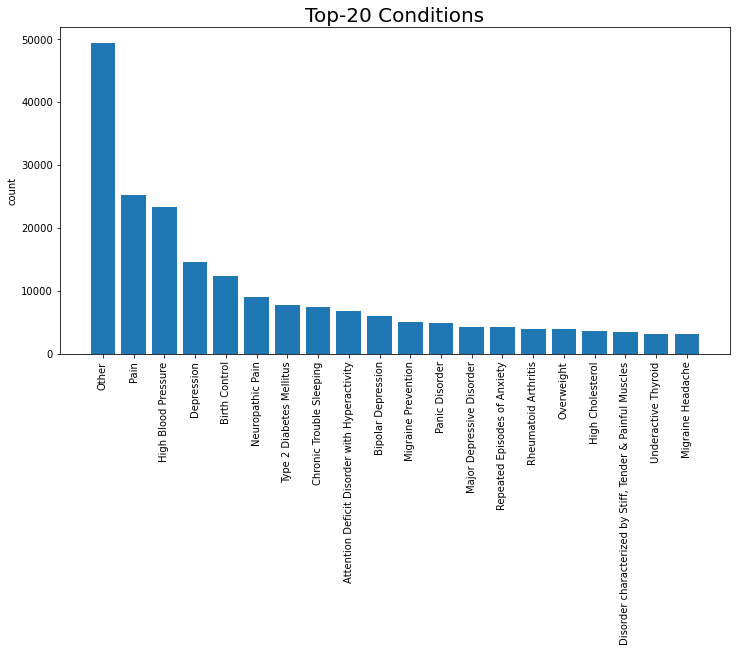

In [45]:
#plot a bargraph to check top 20 conditions
plt.figure(figsize=(12,6))
conditions =data['Condition'].value_counts(ascending = False).head(20)
plt.bar(conditions.index,conditions.values)
plt.title('Top-20 Conditions',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

Others is topping with around 50000

Most of the conditions for top 20 conditions are between 5000 to50000

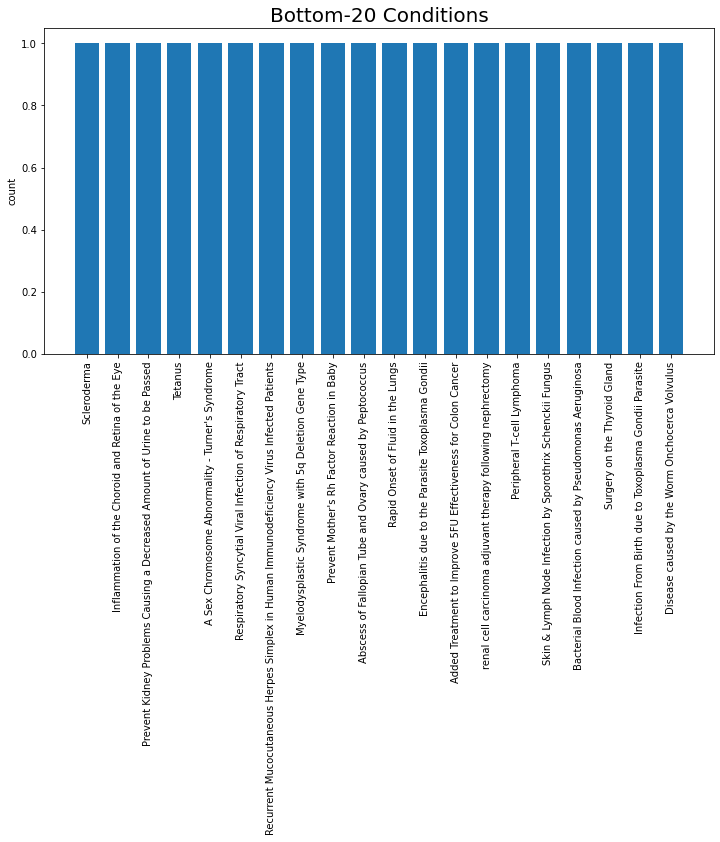

In [46]:
#plot a bargraph to check bottom 20 conditions
plt.figure(figsize=(12,6))
conditions_bottom =data['Condition'].value_counts(ascending = False).tail(20)
plt.bar(conditions_bottom.index,conditions_bottom.values)
plt.title('Bottom-20 Conditions',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

Bottom 20 conditions have just single counts in our dataset. They may be the rare conditions.

In [47]:

table=pd.crosstab(index=data['Sides_class'],columns=data['Condition'])

In [48]:
table

Condition,"""Change of Life"" Signs",A Breaking Out of the Skin Resembling Acne,A Chronic Multisystem Inflammatory Disorder,A Condition in which Hair Falls Out in Patches,A Condition of Bladder Dysfunction from Nerve Disorder,A Feeling of Restlessness with Inability to Sit Still,A Fungal Infection - Aspergillosis,A Hereditary Progressive Anemia of Unknown Cause,A Lack of Fatty Acids,A Malignant Pigmented Mole or Tumor,...,malignant tumor or cancer,neurotrophic keratitis,non-metastatic castration-resistant prostate cancer,osteoporosis in postmenopausal woman at high risk for fracture,pemphigus vulgaris,primary progressive multiple sclerosis,raised seborrheic keratosis,refractory lung disease due to MAC,renal cell carcinoma adjuvant therapy following nephrectomy,seborrheic dermatitis of scalp
Sides_class,,,,,,,,,,,,,,,,,,,,,
0,42,3,0,1,0,0,4,0,0,1,...,3,0,1,4,0,1,4,0,0,5
1,1719,0,11,3,9,259,12,29,1,0,...,1,2,1,0,3,0,0,1,0,0
2,807,0,0,0,7,1,1,1,0,9,...,2,0,0,2,0,0,0,0,1,0
3,0,0,0,0,14,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Drug

In [49]:
data['Drug'].describe()

count       361826
unique        7093
top       cymbalta
freq          4646
Name: Drug, dtype: object

In [50]:
data[['DrugId','Drug']]

,DrugId,Drug
0,146724,25dph-7.5peh
1,146724,25dph-7.5peh
2,144731,warfarin (bulk) 100 % powder
3,144731,warfarin (bulk) 100 % powder
4,144731,warfarin (bulk) 100 % powder
...,...,...
362801,144470,chantix
362802,144470,chantix
362803,144470,chantix
362804,144470,chantix


Drug Id is unique for each drug so we  can remove on of them in modeling part

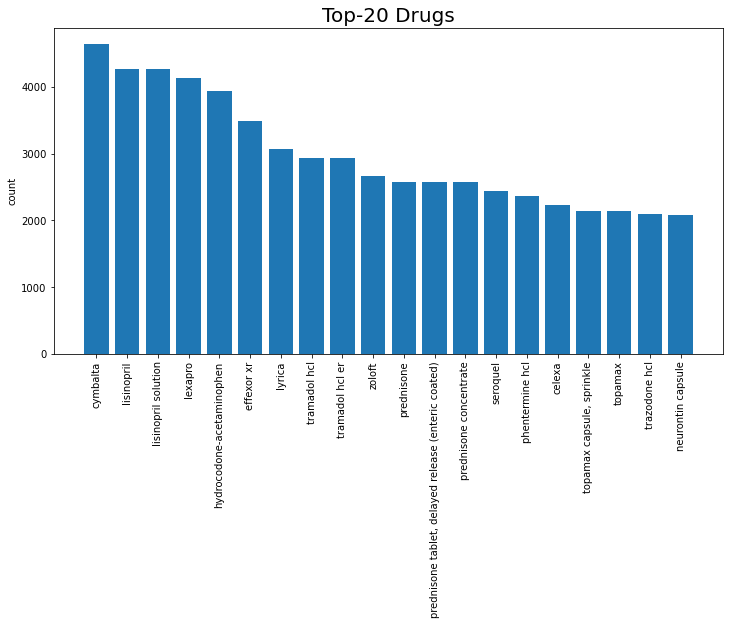

In [51]:
#plot a bargraph to check top 20 Drug
plt.figure(figsize=(12,6))
drugs =data['Drug'].value_counts(ascending = False).head(20)
plt.bar(drugs.index,drugs.values)
plt.title('Top-20 Drugs',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

Cymbalta is topping with arrond 5000

In [52]:
table1=pd.crosstab(index=data['Sides_class'],columns=data['Drug'])
table1

Drug,12 hour decongestant,"12 hour nasal relief spray, non-aerosol",15dm-100gfn-5peh,20dm-4cpm,25dph-7.5peh,"4 way spray, non-aerosol",40pse-400gfn-20dm,5-hydroxy-l-tryptophan powder,5-hydroxytryptophan (5-htp) capsule,60pse-400gfn,...,zyprexa vial,zyprexa zydis,zyrtec,zyrtec-d,zytaze,zytiga,zyvox,"zyvox solution, intravenous","zyvox suspension, reconstituted",zzzquil
Sides_class,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,2,4,3,...,0,0,364,0,1,29,0,0,0,0
1,1,1,1,1,2,1,3,0,0,0,...,0,20,0,63,0,0,45,16,45,147
2,0,0,0,0,0,0,0,0,0,0,...,7,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Based on this we can say thais we can say that side effects higly depend on the drug name

In [53]:
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Sides_count', 'Sides_class'],
      dtype='object')

#### EaseofUse

In [54]:
data.EaseofUse.describe()

count    361826.000000
mean          4.019573
std           1.318334
min           1.000000
25%           3.000000
50%           5.000000
75%           5.000000
max          10.000000
Name: EaseofUse, dtype: float64

In [55]:
data[data['EaseofUse']=='']

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Sides_count,Sides_class


In [56]:
data['EaseofUse'].value_counts()

5     192212
4      74395
3      41166
1      35874
2      18176
6          2
10         1
Name: EaseofUse, dtype: int64

Text(0, 0.5, 'Count')

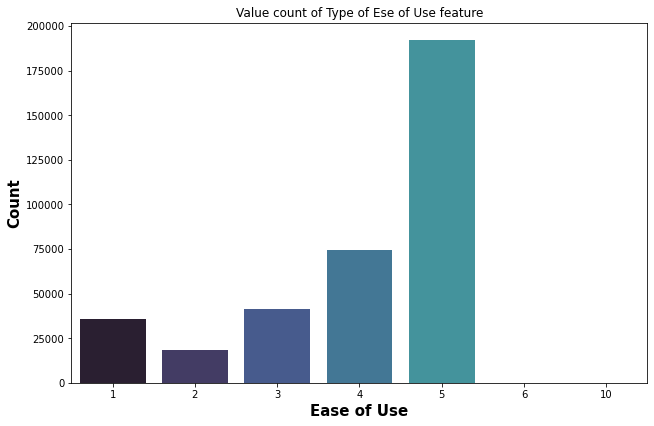

In [57]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = data, x = 'EaseofUse', palette='mako')
plt.title('Value count of Type of Ese of Use feature')
ax.set_xlabel("Ease of Use",fontsize=15, weight='semibold')
ax.set_ylabel("Count",fontsize=15, weight='semibold')



Patients are only rated upto 5 .here 5 is more compared to others

In [58]:
table2=pd.crosstab(index=data['Sides_class'],columns=data['EaseofUse'])
table2

EaseofUse,1,2,3,4,5,6,10
Sides_class,,,,,,,
0,13942,6174,14292,24085,60536,0,0
1,16452,8945,19913,37178,95953,0,0
2,4780,2656,6022,11450,31040,2,1
3,700,401,939,1682,4683,0,0


Text(22.19999999999999, 0.5, 'Count')

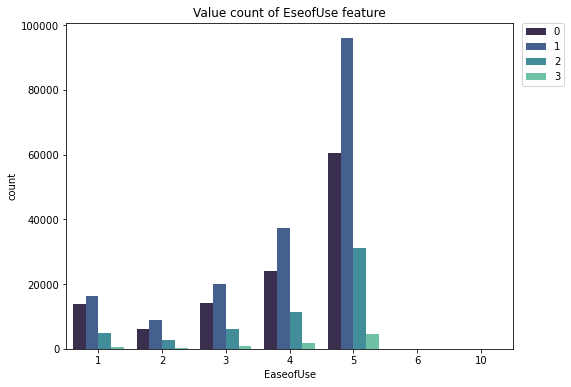

In [59]:
fig = plt.figure(figsize=(8,6))

sns.countplot(data = data, x = 'EaseofUse', hue = 'Sides_class', palette='mako')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Value count of EseofUse feature')
ax.set_xlabel("Ease of Use",fontsize=15, weight='semibold')
ax.set_ylabel("Count",fontsize=15, weight='semibold')

#### Effectiveness

In [60]:
data.Effectiveness.describe()

count    361826.00000
mean          3.53206
std           1.45605
min           1.00000
25%           3.00000
50%           4.00000
75%           5.00000
max          10.00000
Name: Effectiveness, dtype: float64

In [61]:
data.Effectiveness.value_counts()

5     130023
4      81660
3      60185
1      59251
2      30704
6          2
10         1
Name: Effectiveness, dtype: int64

Text(0, 0.5, 'Count')

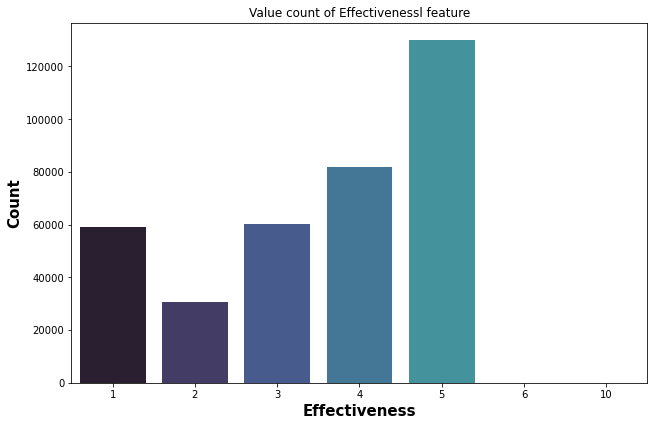

In [62]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = data, x = 'Effectiveness', palette='mako')
plt.title('Value count of Effectivenessl feature')
ax.set_xlabel("Effectiveness",fontsize=15, weight='semibold')
ax.set_ylabel("Count",fontsize=15, weight='semibold')


Text(22.19999999999999, 0.5, 'Count')

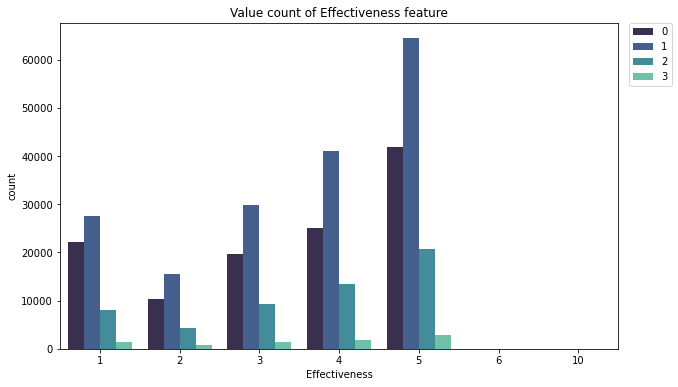

In [63]:
fig = plt.figure(figsize=(10,6))

sns.countplot(data = data, x = 'Effectiveness', hue = 'Sides_class', palette='mako')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Value count of Effectiveness feature')
ax.set_xlabel("Effectiveness",fontsize=15, weight='semibold')
ax.set_ylabel("Count",fontsize=15, weight='semibold')

In [64]:
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Sides_count', 'Sides_class'],
      dtype='object')

#### Satisfaction

In [65]:
data['Satisfaction'].describe()

count    361826.000000
mean          3.134957
std           1.611040
min           1.000000
25%           1.000000
50%           3.000000
75%           5.000000
max          10.000000
Name: Satisfaction, dtype: float64

In [66]:
data['Satisfaction'].value_counts()

5     111164
1     100697
4      63031
3      51784
2      35147
6          2
10         1
Name: Satisfaction, dtype: int64

Text(0, 0.5, 'Count')

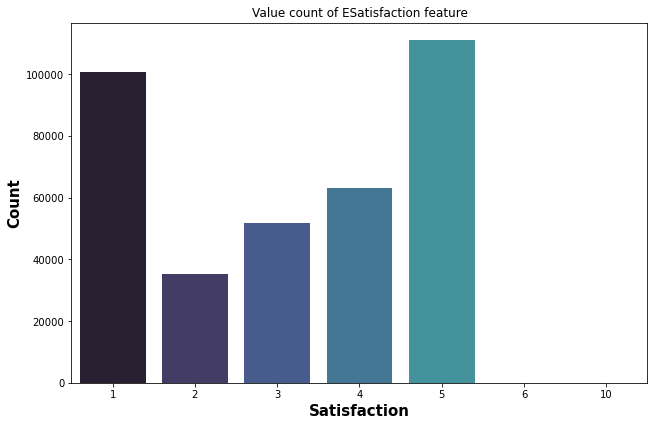

In [67]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = data, x = 'Satisfaction', palette='mako')
plt.title('Value count of ESatisfaction feature')
ax.set_xlabel("Satisfaction",fontsize=15, weight='semibold')
ax.set_ylabel("Count",fontsize=15, weight='semibold')


Text(22.19999999999999, 0.5, 'Count')

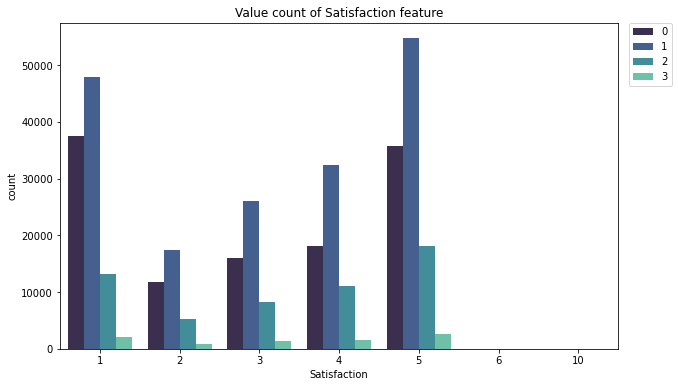

In [68]:
fig = plt.figure(figsize=(10,6))

sns.countplot(data = data, x = 'Satisfaction', hue = 'Sides_class', palette='mako')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Value count of Satisfaction feature')
ax.set_xlabel("Satisfaction",fontsize=15, weight='semibold')
ax.set_ylabel("Count",fontsize=15, weight='semibold')

#### Sex

In [69]:
data.Sex.describe()

count     361826
unique         3
top       Female
freq      237735
Name: Sex, dtype: object

In [70]:
data.Sex.value_counts()

Female    237735
Male       97657
           26434
Name: Sex, dtype: int64

In [71]:
no_sex=data.index[data['Sex'].apply(lambda x: x==' ')].tolist()

for i in no_sex:
    data.loc[data.index==i,'Sex']='Not mentioned'  

Text(0, 0.5, 'Count')

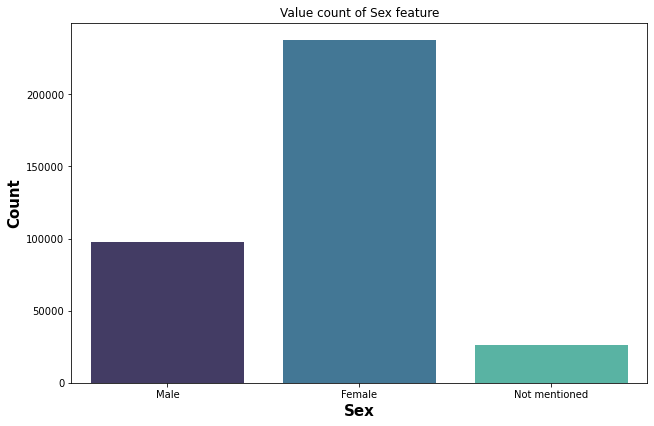

In [72]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = data, x = 'Sex', palette='mako')
plt.title('Value count of Sex feature')
ax.set_xlabel("Sex",fontsize=15, weight='semibold')
ax.set_ylabel("Count",fontsize=15, weight='semibold')

In [73]:
data['Sex'].value_counts()

Female           237735
Male              97657
Not mentioned     26434
Name: Sex, dtype: int64

Text(22.19999999999999, 0.5, 'Count')

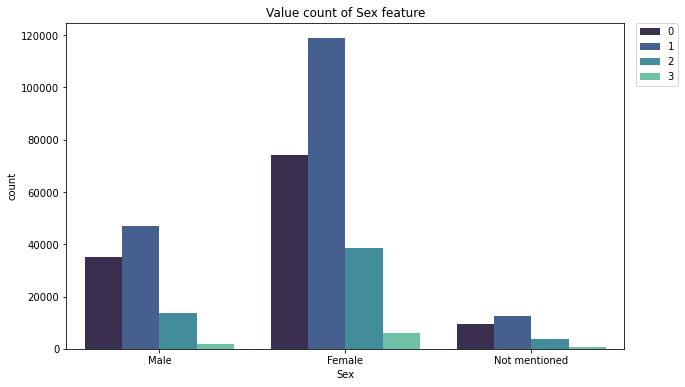

In [74]:
fig = plt.figure(figsize=(10,6))

sns.countplot(data = data, x = 'Sex', hue = 'Sides_class', palette='mako')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Value count of Sex feature')
ax.set_xlabel("Sex",fontsize=15, weight='semibold')
ax.set_ylabel("Count",fontsize=15, weight='semibold')

#### UsefulCount

In [75]:
data.UsefulCount.value_counts()

0      71076
1      46138
2      34667
3      27252
4      22831
       ...  
136        1
178        1
176        1
169        1
95         1
Name: UsefulCount, Length: 148, dtype: int64

In [76]:
data.UsefulCount.describe()

count    361826.000000
mean          6.752837
std           9.327556
min           0.000000
25%           1.000000
50%           4.000000
75%           9.000000
max         255.000000
Name: UsefulCount, dtype: float64

Text(0.5, 1.0, 'Distribution of UsefulCount')

<Figure size 576x360 with 0 Axes>

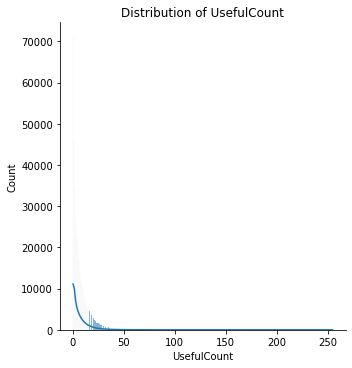

In [77]:
plt.figure(figsize = (8,5))
sns.displot(data = data['UsefulCount'], palette='mako', kde=True, height = 5)
plt.title('Distribution of UsefulCount')

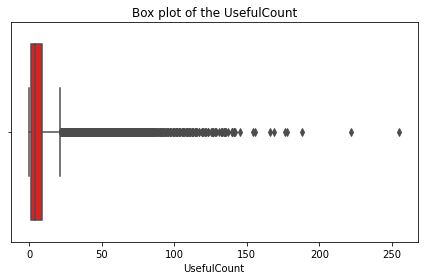

In [78]:

sns.boxplot(x=data["UsefulCount"],color="red")
plt.title("Box plot of the UsefulCount")
plt.tight_layout()
plt.show()

There are lot of outliers

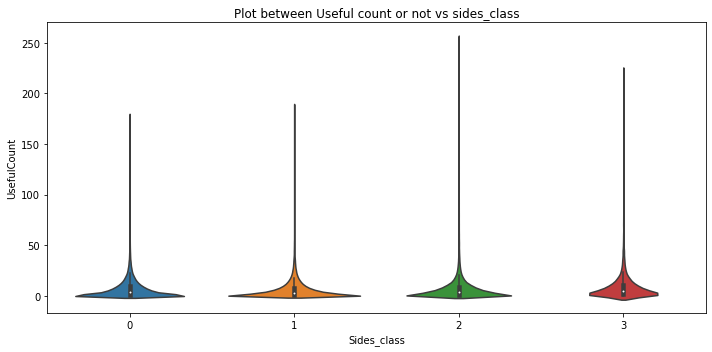

In [79]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Sides_class',y='UsefulCount',data=data)
plt.title("Plot between Useful count or not vs sides_class" )
plt.tight_layout()
plt.show()

 Patients whose  count of side effects inbetween 8 and 12 reviewed more   

#### Reviews

In [80]:
data.Reviews.describe()

count     361826
unique    250167
top             
freq       41700
Name: Reviews, dtype: object

In [81]:
data['Reviews'][0]

"I'm a retired physician and of all the meds I have tried for my allergies (seasonal and not) - this one is the most effective for me.  When I first began using this drug some years ago - tiredness as a problem but is not currently."

In [82]:
#Cleaning review column

Converting to lower case is necessary. Otherwise,it will consider the same word
with an uppercase as a different word. Like ‘me’ and ‘Me’ will be considered as different words.

In [83]:
data['review1'] = data['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['review1'].head()

0    i'm a retired physician and of all the meds i ...
1    cleared me right up even with my throat hurtin...
2    why did my ptinr go from a normal of 2.5 to ov...
3                         falling and don't realise it
4    my grandfather was prescribed this medication ...
Name: review1, dtype: object

This step is to remove the punctuations. Because of punctuation, a word might be treated differently than it originally is.
For example ‘use’ and ‘use:’ will become different words because of punctuation.

In [84]:
data['eview1'] = data['review1'].str.replace('[^\w\s]', '')

C:\Users\XARCHI~1\AppData\Local\Temp/ipykernel_12256/3834307678.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['eview1'] = data['review1'].str.replace('[^\w\s]', '')


Removing Stop Words

In [85]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\XArchitecture\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
data['review1'] = data['review1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

Remove the Rare Words

In [87]:
freq = pd.Series(' '.join(data['review1']).split()).value_counts()
less_freq = list(freq[freq == 1].index)
less_freq

['all..amazing!(especially',
 'wishy',
 "business...it's",
 'wic',
 'treatment,no',
 'but,hey,',
 'libio',
 'robaxin(3x/day)',
 'oblong?',
 '20cmg',
 'easy!.',
 'job.(jailer)',
 'latida',
 'washy',
 'me)..unit',
 'diabetics)',
 'arround.',
 'burns.i',
 '20mcg..fridge',
 'days..sure',
 'keratosis;',
 'baggie,',
 'ever.it',
 'onevertebra',
 'defecate!',
 'rest..and',
 'prayed.',
 'night.....you',
 'painful,humongous',
 '136lbs',
 'fussion(2',
 'soma(4x/day),',
 '(well...waste',
 'nuisances',
 'using.if',
 'ears.dizziness,no',
 'inaccurate,',
 'bam..i',
 'on-the-job',
 'working.now',
 'shot..not',
 'fine~~although',
 '120/64.',
 'warm-soothing',
 'side,effects,upset-tummy',
 'time.lantus',
 'reconmended',
 'stars!!!',
 'leasioins',
 'weight,all',
 'l-4,5',
 '(edex).',
 'percise',
 'head.ringing',
 '5-6$',
 'bowe.',
 'edex...my',
 'well...be',
 'swab,',
 'bit..drug',
 'zaps,in',
 'guys..we',
 'away--still',
 'vivid!',
 'get..its',
 'clornazapan',
 'weaps,',
 'all,45',
 'fullfilled,',
 'now

In [88]:
#data['review1'] = data['review1'].apply(lambda x: " ".join(x for x in x.split() if x not in less_freq))
#data['review1'].head()

In [89]:
pip install textblob

In [90]:
from textblob import TextBlob

In [91]:
def get_sentiment(text):
    blob=TextBlob(text)
    return sentiment.polarity
def get_sentiment_label(text):
    blob=TextBlob(text)
    if blob.polarity>0:
        result='positive'
    elif blob.polarity<0:
        result='negative'
    else:
        result='neutral'
    return result

In [92]:
data['Sentiment_label']=data['review1'].apply(get_sentiment_label)

<AxesSubplot:>

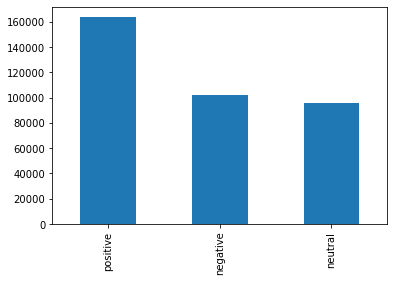

In [93]:
data['Sentiment_label'].value_counts().plot(kind='bar')

In [94]:
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Sides_count', 'Sides_class', 'review1', 'eview1',
       'Sentiment_label'],
      dtype='object')

In [95]:
data[['Satisfaction','Sentiment_label','UsefulCount']].head(20)

,Satisfaction,Sentiment_label,UsefulCount
0,5,positive,0
1,5,positive,1
2,3,positive,0
3,1,neutral,0
4,1,positive,1
5,4,neutral,0
6,2,negative,0
7,5,neutral,0
8,2,neutral,1
9,2,neutral,0


Text(22.19999999999999, 0.5, 'Count')

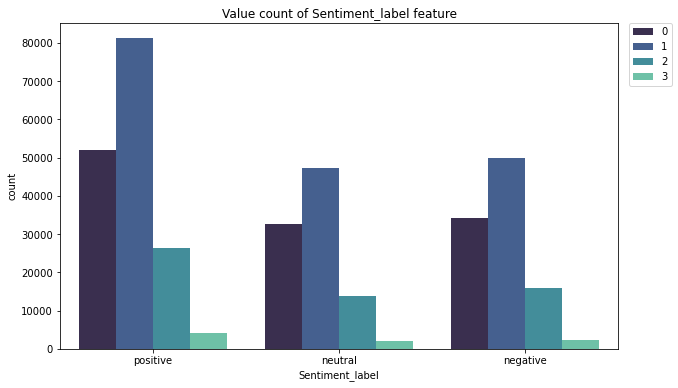

In [96]:
ig = plt.figure(figsize=(10,6))

sns.countplot(data = data, x = 'Sentiment_label', hue = 'Sides_class', palette='mako')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Value count of Sentiment_label feature')
ax.set_xlabel("Sentiment_label",fontsize=15, weight='semibold')
ax.set_ylabel("Count",fontsize=15, weight='semibold')

### Preprocessing

#### Outlier handling

Text(0, 0.5, 'No of UsefulCount')

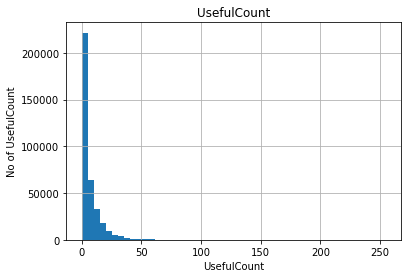

In [97]:
figure=data.UsefulCount.hist(bins=50)
figure.set_title('UsefulCount')
figure.set_xlabel('UsefulCount')
figure.set_ylabel('No of UsefulCount')

 boxplot plotted above shows Usefulcount feature contains lot of Outliers and it right skewed

In [98]:
data.UsefulCount.describe()

count    361826.000000
mean          6.752837
std           9.327556
min           0.000000
25%           1.000000
50%           4.000000
75%           9.000000
max         255.000000
Name: UsefulCount, dtype: float64

In [99]:
# Compte the Interquantile range to calculate the boundaries
IQR=data.UsefulCount .quantile(0.75)-data.UsefulCount.quantile(0.25)
IQR

8.0

In [100]:
# Exreme outliers
lower_bridge=data['UsefulCount'].quantile(0.10)-(IQR*3)
upper_bridge=data['UsefulCount'].quantile(0.90)+(IQR*3)
print(lower_bridge)
print(upper_bridge)

-24.0
41.0


In [101]:
data[data['UsefulCount']>41]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Sides_count,Sides_class,review1,eview1,Sentiment_label
235,55-64,Neuropathic Pain,2/23/2017,lyrica,93965,1,1,been taking lyrica for 2 months. has not helpe...,1,Not mentioned,"[Drowsiness , dizziness , dry mouth , ...",44,6,1,"taking lyrica 2 months. helped pain, horrible ...",been taking lyrica for 2 months has not helped...,negative
250,55-64,Neuropathic Pain,11/13/2016,lyrica,93965,1,1,I have Fibromyalgia and severe neuropathy as w...,1,Not mentioned,"[Drowsiness , dizziness , dry mouth , ...",42,6,1,fibromyalgia severe neuropathy well sciatic pa...,i have fibromyalgia and severe neuropathy as w...,positive
263,45-54,Neuropathic Pain,7/10/2016,lyrica,93965,5,5,Take Lyrica for fibromyalgia. Works great for ...,1,Not mentioned,"[Drowsiness , dizziness , dry mouth , ...",60,6,1,take lyrica fibromyalgia. works great pain. ho...,take lyrica for fibromyalgia works great for t...,positive
268,55-64,Neuropathic Pain,5/28/2016,lyrica,93965,4,2,I have been taking Lyric for about 4 months. W...,1,Male,"[Drowsiness , dizziness , dry mouth , ...",48,6,1,taking lyric 4 months. reduced pain feet somew...,i have been taking lyric for about 4 months wh...,negative
270,55-64,Neuropathic Pain,5/6/2016,lyrica,93965,5,5,The pain from my peripheral neuropathy was so ...,5,Not mentioned,"[Drowsiness , dizziness , dry mouth , ...",61,6,1,"pain peripheral neuropathy great, even though ...",the pain from my peripheral neuropathy was so ...,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361916,45-54,Stop Smoking,9/21/2007,chantix,144470,5,5,"while this drug helps you quit smoking, which ...",1,Female,"[Nausea , headache , vomiting , drowsi...",53,9,2,"drug helps quit smoking, vital health, withdra...",while this drug helps you quit smoking which i...,positive
361991,45-54,Stop Smoking,9/18/2013,chantix,144470,5,4,"38 year smoker, smoking a carton a week with a...",4,Female,"[Nausea , headache , vomiting , drowsi...",63,9,2,"38 year smoker, smoking carton week chronic co...",38 year smoker smoking a carton a week with a ...,positive
362219,25-34,Stop Smoking,3/13/2008,chantix,144470,1,5,I took chantix for three months.Quit smoking a...,2,Male,"[Nausea , headache , vomiting , drowsi...",47,9,2,took chantix three months.quit smoking first w...,i took chantix for three monthsquit smoking af...,negative
362423,25-34,Stop Smoking,12/1/2007,chantix,144470,1,1,I beg anyone considering this drug to look up ...,1,Female,"[Nausea , headache , vomiting , drowsi...",43,9,2,beg anyone considering drug look discussion bo...,i beg anyone considering this drug to look up ...,negative


In [102]:
data.loc[data['UsefulCount']>41,'UsefulCount']=41

In [103]:
data.UsefulCount.describe()

count    361826.000000
mean          6.569102
std           8.247138
min           0.000000
25%           1.000000
50%           4.000000
75%           9.000000
max          41.000000
Name: UsefulCount, dtype: float64

Text(0, 0.5, 'No of UsefulCount')

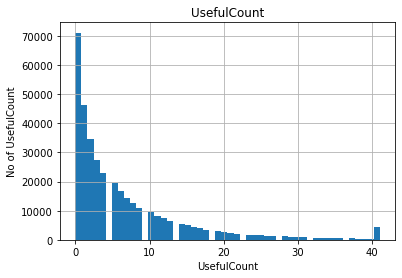

In [104]:
figure=data.UsefulCount.hist(bins=50)
figure.set_title('UsefulCount')
figure.set_xlabel('UsefulCount')
figure.set_ylabel('No of UsefulCount')

#### Encoding

In [105]:
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Sides_count', 'Sides_class', 'review1', 'eview1',
       'Sentiment_label'],
      dtype='object')

In [106]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder={}
cat_data=['Age','Sex','Sentiment_label']
for i in cat_data:
    label_encoder[i] = LabelEncoder()
    data[i] = label_encoder[i].fit_transform(data[i]) 

In [107]:
data.head(5)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Sides_count,Sides_class,review1,eview1,Sentiment_label
0,10,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,1,"[Drowsiness , dizziness , dry mouth /nose...",0,7,1,i'm retired physician meds tried allergies (se...,im a retired physician and of all the meds i h...,2
1,3,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,0,"[Drowsiness , dizziness , dry mouth /nose...",1,7,1,cleared right even throat hurting went away ta...,cleared me right up even with my throat hurtin...,2
2,8,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,0,[No side Effect ],0,1,0,ptinr go normal 2.5 100?,why did my ptinr go from a normal of 25 to ove...,2
3,10,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,0,[No side Effect ],0,1,0,falling realise,falling and dont realise it,1
4,5,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,1,[No side Effect ],1,1,0,grandfather prescribed medication (coumadin) a...,my grandfather was prescribed this medication ...,2


In [108]:
data.Condition.value_counts().to_dict()

{'Other': 49332,
 'Pain': 25199,
 'High Blood Pressure': 23268,
 'Depression': 14505,
 'Birth Control': 12251,
 'Neuropathic Pain': 8988,
 'Type 2 Diabetes Mellitus': 7646,
 'Chronic Trouble Sleeping': 7405,
 'Attention Deficit Disorder with Hyperactivity': 6800,
 'Bipolar Depression': 5946,
 'Migraine Prevention': 4988,
 'Panic Disorder': 4867,
 'Major Depressive Disorder': 4254,
 'Repeated Episodes of Anxiety': 4138,
 'Rheumatoid Arthritis': 3963,
 'Overweight': 3888,
 'High Cholesterol': 3592,
 'Disorder characterized by Stiff, Tender & Painful Muscles': 3471,
 'Underactive Thyroid': 3153,
 'Migraine Headache': 3045,
 'Anxious': 3015,
 'Chronic Pain': 2911,
 'Asthma': 2585,
 '"Change of Life" Signs': 2568,
 'Cough': 2563,
 'Acne': 2517,
 'Joint Damage causing Pain and Loss of Function': 2451,
 'Pain Originating From a Nerve': 2398,
 'Muscle Spasm': 2008,
 'Condition in which Stomach Acid is Pushed Into the Esophagus': 1915,
 'Stop Smoking': 1749,
 'Combined High Blood Cholesterol an

In [109]:
for g in conditions.index:
    data['condition_' + g] = data['Condition'].apply(lambda x: 1 if g == x else 0)

In [110]:
#for m in drugs.index:
  #  data['Drug_' + m] = data['Drug'].apply(lambda x: 1 if m == x else 0)

In [111]:
data.shape

(361826, 37)

In [112]:
data['Age'].value_counts()

6     79857
7     74836
5     54948
3     49479
8     41121
2     24228
10    15188
11    12145
1      7045
9      1644
4       838
0       497
Name: Age, dtype: int64

In [113]:
df=data.copy()

In [114]:
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Sides_count', 'Sides_class', 'review1', 'eview1',
       'Sentiment_label', 'condition_Other', 'condition_Pain',
       'condition_High Blood Pressure', 'condition_Depression',
       'condition_Birth Control', 'condition_Neuropathic Pain',
       'condition_Type 2 Diabetes Mellitus',
       'condition_Chronic Trouble Sleeping',
       'condition_Attention Deficit Disorder with Hyperactivity',
       'condition_Bipolar Depression', 'condition_Migraine Prevention',
       'condition_Panic Disorder', 'condition_Major Depressive Disorder',
       'condition_Repeated Episodes of Anxiety',
       'condition_Rheumatoid Arthritis', 'condition_Overweight',
       'condition_High Cholesterol',
       'condition_Disorder characterized by Stiff, Tender & Painful Muscles',
       'condition_Underactive Thyroid', 'condition_Migraine Headache'],


In [115]:
y=data['Sides_class']

In [116]:
x=data.drop(['Condition', 'Date','Drug','Reviews','Sides_count','Sides','Sides_class'],axis=1)

In [117]:
x=x.drop(['review1'],axis=1)

In [118]:
x=x.drop(['eview1'],axis=1)

In [119]:
cor_matrix=x.corr().abs()

<AxesSubplot:>

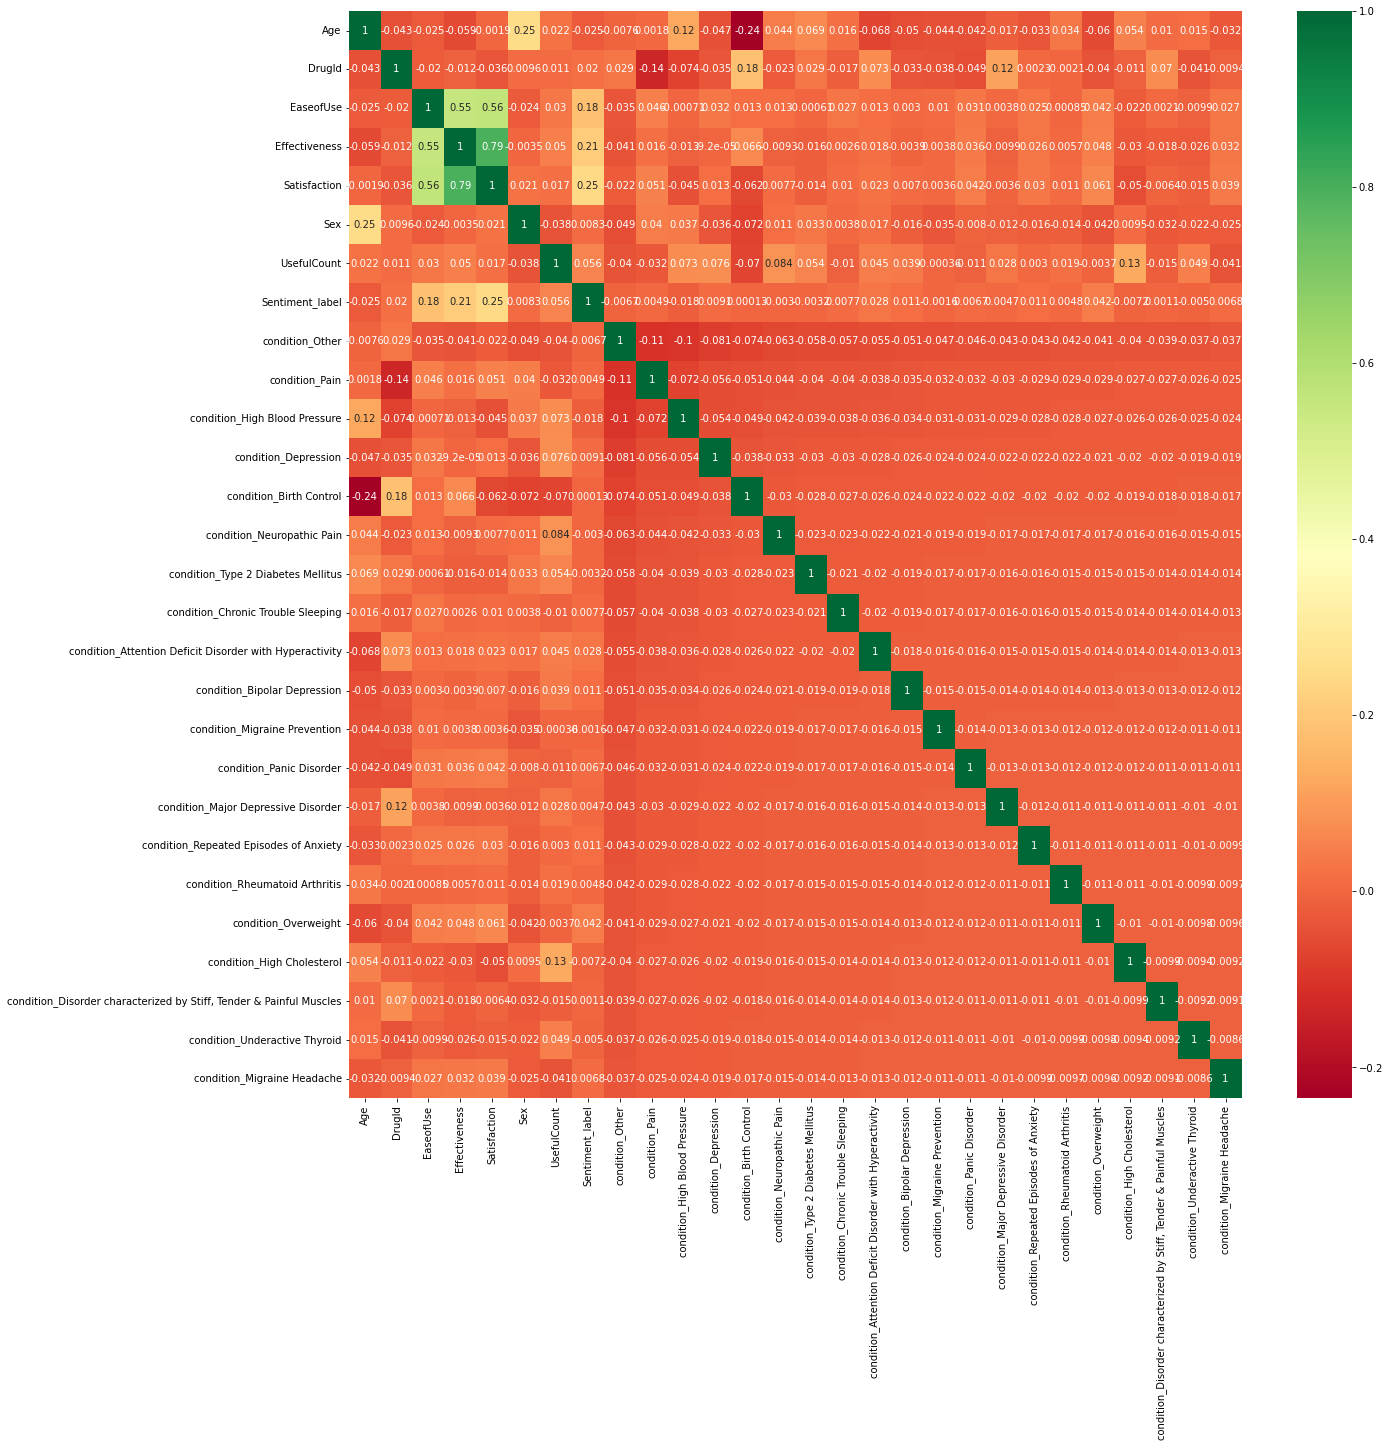

In [120]:
corrmat=x.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [121]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [122]:
bestfeatures=SelectKBest(score_func=chi2,k='all')
fit=bestfeatures.fit(x,y)

In [123]:
datascores=pd.DataFrame(fit.scores_)
datacolumns=pd.DataFrame(x.columns)

In [124]:
featurescores=pd.concat([datacolumns,datascores],axis=1)
featurescores.columns=['Columns','Score']

In [125]:
featurescores

,Columns,Score
0,Age,5.618500e+03
1,DrugId,2.238802e+08
2,EaseofUse,3.542635e+02
3,Effectiveness,3.465298e+02
4,Satisfaction,8.611411e+02
5,Sex,8.877521e+02
6,UsefulCount,9.323224e+03
7,Sentiment_label,8.870173e+01
8,condition_Other,4.942870e+02
9,condition_Pain,1.424685e+04


In [126]:
print(featurescores.nlargest(30,'Score'))

                                              Columns         Score
1                                              DrugId  2.238802e+08
11                               condition_Depression  2.332227e+04
10                      condition_High Blood Pressure  2.159573e+04
15                 condition_Chronic Trouble Sleeping  1.711419e+04
16  condition_Attention Deficit Disorder with Hype...  1.491555e+04
9                                      condition_Pain  1.424685e+04
18                      condition_Migraine Prevention  1.264617e+04
6                                         UsefulCount  9.323224e+03
24                         condition_High Cholesterol  6.594830e+03
26                      condition_Underactive Thyroid  6.431533e+03
0                                                 Age  5.618500e+03
12                            condition_Birth Control  5.187964e+03
13                         condition_Neuropathic Pain  3.891046e+03
23                               condition_Overw

In [127]:
selected_feature=featurescores.nlargest(22,'Score').Columns
selected_feature

1                                                DrugId
11                                 condition_Depression
10                        condition_High Blood Pressure
15                   condition_Chronic Trouble Sleeping
16    condition_Attention Deficit Disorder with Hype...
9                                        condition_Pain
18                        condition_Migraine Prevention
6                                           UsefulCount
24                           condition_High Cholesterol
26                        condition_Underactive Thyroid
0                                                   Age
12                              condition_Birth Control
13                           condition_Neuropathic Pain
23                                 condition_Overweight
17                         condition_Bipolar Depression
20                  condition_Major Depressive Disorder
19                             condition_Panic Disorder
25    condition_Disorder characterized by Stiff,

<AxesSubplot:>

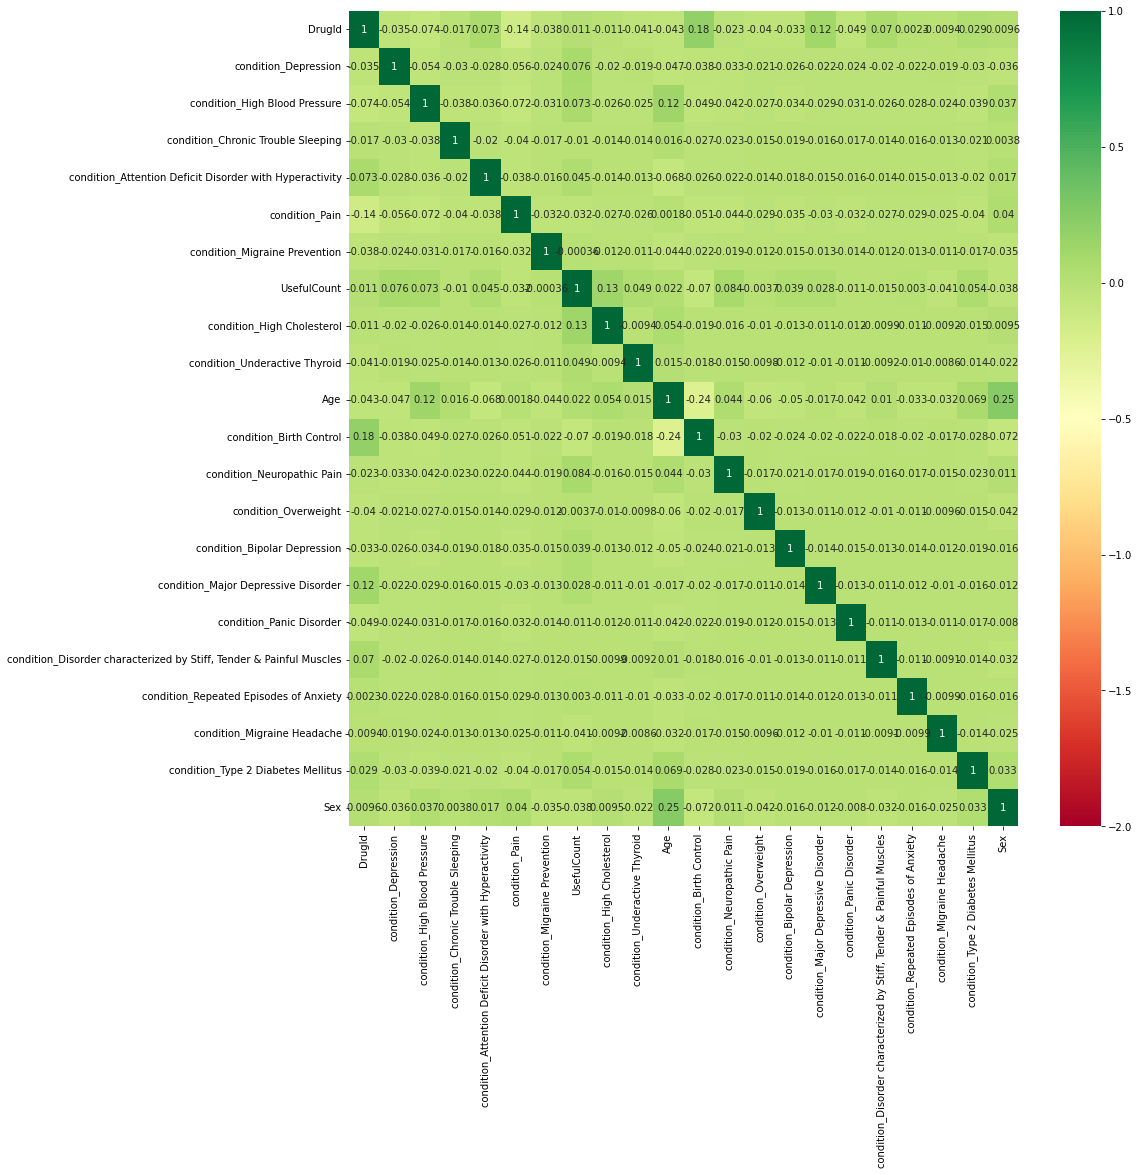

In [128]:
corrmat=x[selected_feature].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corrmat,vmin=-2,vmax=1,annot=True,cmap="RdYlGn")

In [129]:
x=x[selected_feature]

In [130]:
x=x.drop(['UsefulCount'],axis=1)

In [131]:
x.columns

Index(['DrugId', 'condition_Depression', 'condition_High Blood Pressure',
       'condition_Chronic Trouble Sleeping',
       'condition_Attention Deficit Disorder with Hyperactivity',
       'condition_Pain', 'condition_Migraine Prevention',
       'condition_High Cholesterol', 'condition_Underactive Thyroid', 'Age',
       'condition_Birth Control', 'condition_Neuropathic Pain',
       'condition_Overweight', 'condition_Bipolar Depression',
       'condition_Major Depressive Disorder', 'condition_Panic Disorder',
       'condition_Disorder characterized by Stiff, Tender & Painful Muscles',
       'condition_Repeated Episodes of Anxiety', 'condition_Migraine Headache',
       'condition_Type 2 Diabetes Mellitus', 'Sex'],
      dtype='object')

In [132]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)


In [133]:
#Scaling
#from sklearn.preprocessing import  StandardScaler
#scale=StandardScaler()
#x_train=scale.fit_transform(x_train)
#x_test=scale.fit_transform(x_test)

#### Machine Learning Model

In [134]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [135]:
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, plot_roc_curve,confusion_matrix
import warnings


In [136]:
warnings.filterwarnings("ignore")

In [137]:
logisreg_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
XGB_clf = XGBClassifier()
mnb_clf=MultinomialNB()

In [138]:
clf_list = [logisreg_clf, dt_clf, rf_clf, XGB_clf,mnb_clf]
clf_name_list = ['Logistic Regression','Decision Tree', 'Random Forest', 'XGBClassifier','MultinomialNB']

for clf in clf_list:
    clf.fit(x_train,y_train)

In [139]:
train_acc_list = []
test_acc_list = []

for clf,name in zip(clf_list,clf_name_list):
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    print(f'Using model: {name}')
    print(f'Trainning Score: {clf.score(x_train, y_train)}')
    print(f'Test Score: {clf.score(x_test, y_test)}')
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred_test)}')
    train_acc_list.append(accuracy_score(y_train, y_pred_train))
    test_acc_list.append(accuracy_score(y_test, y_pred_test))
    print('======================================================')

Using model: Logistic Regression
Trainning Score: 0.46724590617010986
Test Score: 0.4651770168311085
Acc Train: 0.46724590617010986
Acc Test: 0.4651770168311085
Using model: Decision Tree
Trainning Score: 0.9693740067712292
Test Score: 0.9588066218942597
Acc Train: 0.9693740067712292
Acc Test: 0.9588066218942597
Using model: Random Forest
Trainning Score: 0.969360187936157
Test Score: 0.9345272641848382
Acc Train: 0.969360187936157
Acc Test: 0.9345272641848382
Using model: XGBClassifier
Trainning Score: 0.921671388101983
Test Score: 0.921924660752287
Acc Train: 0.921671388101983
Acc Test: 0.921924660752287
Using model: MultinomialNB
Trainning Score: 0.5209839010571409
Test Score: 0.5209490644777934
Acc Train: 0.5209839010571409
Acc Test: 0.5209490644777934
